In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_image(image, label):
    '''Normalizes and flattens the image. Returns image as input and label.'''
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    image = tf.reshape(image, shape=(784,))

    return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [6]:
def simple_autoencoder(inputs):
    '''
    Builds the encoder and decoder using Dense layers
    '''
    encoder = tf.keras.layers.Dense(units=32, activation='relu')(inputs)
    decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(encoder)
  
    return encoder, decoder

def deep_autoencoder(inputs):
    '''Builds the encoder and decoder using Dense layers.'''
    encoder = tf.keras.layers.Dense(units=128, activation='relu')(inputs)
    encoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
    encoder = tf.keras.layers.Dense(units=32, activation='relu')(encoder)

    decoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
    decoder = tf.keras.layers.Dense(units=128, activation='relu')(decoder)
    decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(decoder)

    return encoder, decoder

In [7]:
# Set the input shape
inputs = tf.keras.layers.Input(shape=(784,))

# Get the encoder and decoder output
encoder_output, decoder_output = deep_autoencoder(inputs)

# Setup the encoder because you will visualize its output layer
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)

autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

In [8]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy'
)

In [9]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 6s 12ms/step - loss: 0.2850
Epoch 2/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1371
Epoch 3/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1208
Epoch 4/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1124
Epoch 5/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1073
Epoch 6/50
468/468 [==============================] - 4s 8ms/step - loss: 0.1037
Epoch 7/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1008
Epoch 8/50
468/468 [==============================] - 4s 8ms/step - loss: 0.0983
Epoch 9/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0967
Epoch 10/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0951
Epoch 11/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0938
Epoch 12/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0927
Epoch 13/50
468/468 [===

In [10]:
def display_one_row(disp_images, offset, shape=(28, 28)):
    '''Display sample outputs in one row.'''
    for idx, test_image in enumerate(disp_images):
        plt.subplot(3, 10, offset + idx + 1)
        plt.xticks([])
        plt.yticks([])
        test_image = np.reshape(test_image, shape)
        plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
    '''Displays the input, encoded, and decoded output values.'''
    plt.figure(figsize=(15, 5))
    display_one_row(disp_input_images, 0, shape=(28,28,))
    display_one_row(disp_encoded, 10, shape=enc_shape)
    display_one_row(disp_predicted, 20, shape=(28,28,))

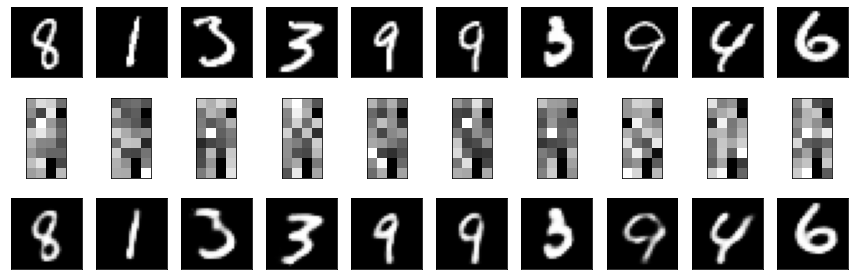

In [11]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# Take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
    output_samples = input_image
    
# Pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# Get the encoder input
encoded_predicted = encoder_model.predict(test_dataset)

# Get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# Display the 10 samples, encodings and decoded values
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])